# Detección de Contornos

En esta práctica, se aprenderán los conceptos de contornos, detección de contronos y descriptores de contornos con OpenCV.

#### Importar librerías y funciones auxiliares



In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

def plot_img(images, titles):
  fig, axs = plt.subplots(nrows = 1, ncols = len(images), figsize = (20, 20))
  for i, p in enumerate(images):
    axs[i].imshow(cv2.cvtColor(p, cv2.COLOR_BGR2RGB))
    axs[i].set_title(titles[i])
    axs[i].axis('off')
  plt.show()

La detección de contornos es uno de los enfoques más importantes de la visión por ordenador para evaluar los elementos de una imagen. Los contornos pueden ayudar al análisis de la forma, la detección de elementos y el reconocimiento.

El contorno es una propiedad típica de los objetos visuales, por lo que detectarlo es una dificultad en el campo de la visión por computadora. Las técnicas de detección de contornos son cruciales para realizar tareas prácticas como el reconocimiento de objetos y la comprensión de escenas. Un contorno es esencialmente una curva que conecta una serie de puntos que rodean una región del mismo tono o intensidad. El objeto que intentamos identificar está formado por esta región de tono o intensidad uniforme, y la curva que rodea esta zona es el contorno que describe la forma del objeto. Así pues, la detección de contornos es idéntica a la detección de bordes, con la excepción de que los bordes identificados deben ser un recorrido cerrado.

<center><img src='Recursos\Amogus_det.png' width=800></center>


Cuando realizamos la detección de bordes, buscamos los lugares en los que la intensidad de los colores varía drásticamente y entonces activamos esos píxeles. Los contornos, en cambio, son agrupaciones abstractas de puntos y segmentos que se ajustan a las formas de los objetos de la imagen. En consecuencia, podemos utilizar los contornos en nuestros algoritmos para realizar tareas como el recuento del número de contornos, la categorización de las formas de los objetos, el recorte de elementos de las imágenes (segmentación de imágenes), y mucho más. La detección de contornos es un trabajo exigente si se tiene en cuenta la variación que puede resultar de las aplicaciones reales. Los detectores que utilizan características locales, en general, no producen resultados adecuados, sobre todo en el caso de las texturas, los objetos con poco contraste o las imágenes con mucho ruido.

La detección de contornos no es el único enfoque para la segmentación de imágenes; hay muchos más, como la segmentación semántica, la transformada de Hough y la segmentación K-Means.

Normalmente se utilizan esquemas que compacten los datos en representaciones más útiles para el cálculo de descriptores. Esquemas de representación comunes:
<ul>
    <li>Código cadena
    <li>Aproximaciones poligonales
</ul>

## Detección de contornos con OpenCV

OpenCV tiene la función `cv2.findContour()` que ayuda a extraer los contornos de la imagen. Funciona mejor en imágenes binarias, por lo que primero debemos aplicar técnicas de umbralización.

#### Sintaxis de Función

``` python
contours, hierarchy = cv2.findContours(src, mode, method, contours, hierarchy)
```

`contours`: Contornos detectados. Almacenados como una serie de puntos en un arreglo.<br>
`hierarchy`: Vector de salida, que contiene información sobre la topología de la imagen.

La función tiene **3 argumento de entrada requeridos** y **2 opcionales**:
<ol>
<li><code>src</code>: Imagen fuente de 8 bits de un solo canal. Los píxeles no nulos se interpretan como 1. Como los píxeles nulos siguen siendo ceros, de esta manera la imagen se interpreta como binaria. Es un argumento <b>obligatorio</b>.
<br>
<br>
<li><code>mode</code>: Modo de recuperación de contornos. Es un argumento <b>obligatorio</b>.
    <ul>
    <b>Modo del algoritmo de recuperación de contornos</b>
    <li><code>cv2.RETR_EXTERNAL</code>: Obtiene sólo los contornos exteriores
    <li><code>cv2.RETR_LIST</code>: Recupera todos los contornos sin establecer ninguna relación jerárquica.
    <li><code>cv2.RETR_CCOMP</code>: Recupera todos los contornos y los organiza en una jerarquía de dos niveles. En el primer nivel, están los límites externos de los componentes. En el segundo nivel, están los límites de los agujeros.
    <li><code>cv2.RETR_TREE</code>: Recupera todos los contornos y reconstruye una jerarquía completa de contornos anidados.
    <li><code>cv2.RETR_FLOODFILL</code>: Umbralizado a cero inverso
    </ul>
<br>
<li><code>method</code>: Método de aproximación del contorno. Es un argumento <b>obligatorio</b>.
    <ul>
    <b>Modo del algoritmo de recuperación de contornos</b>
    <li><code>cv2.CHAIN_APPROX_NONE</code>: Almacena absolutamente todos los puntos del contorno. Es decir, 2 puntos posteriores cualesquiera (x1,y1) y (x2,y2) del contorno serán vecinos horizontales, verticales o diagonales
    <li><code>cv2.CHAIN_APPROX_SIMPLE</code>: Comprime los segmentos horizontales, verticales y diagonales y deja sólo sus puntos finales. Por ejemplo, un contorno rectangular de arriba a abajo se codifica con 4 puntos.
    </ul>
</ol>

Como se ha dicho anteriormente, se necesita construir una imagen binaria, lo que significa que cada píxel de la imagen será blanco o negro. Esto es necesario en OpenCV; la detección de contornos es análoga a la localización de un objeto blanco contra un fondo negro; los objetos a descubrir deben ser blancos, mientras que el fondo debe ser negro.

In [3]:
img = cv2.imread('Imagenes\Drifloon.png', cv2.IMREAD_COLOR)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

retval, thresh = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

Se han almacenado los contornos en un arreglo. Si se desea visualizar estos contornos, se debe de utilizar la función `cv2.drawContours()`. Esta función superpone los contornos en una imagen.

#### Sintaxis de Función

``` python
cv2.drawContours(image, contours, contoursIdx,  color, thickness, linetype)
```

La función tiene **4 argumento de entrada requeridos** y **5 argumentos opcionales**:

<ol>
<li><code>image</code>: Imagen destino. Es un argumento <b>obligatorio</b>.
<li><code>contours</code>: Todos los contornos de entrada. Es un argumento <b>obligatorio</b>.
<li><code>contourIdx</code>: Parámetro que indica un contorno a dibujar. Si es negativo, se dibujan todos los contornos. Es un argumento <b>obligatorio</b>.
<li><code>color</code>: Color de los contornos dibujados. Es un argumento <b>obligatorio</b>.
<li><code>thickness</code>: El grosor de las líneas utilizadas para dibujar los contornos. Los interiores de los contornos se dibujan si es negativo (por ejemplo, <code>thickness=cv2.FILLED</code>).
<li><code>lineType</code>: Tipo de linea. Es un argumento <b>obligatorio</b>.
    <ul>
    <b>Banderas</b>
    <li><b><code>cv2.LINE_4</code></b>
    <li><b><code>cv2.LINE_8</code></b>
    <li><b><code>cv2.LINE_AA</code></b>: Linea antidistorción.
    </ul>
</ol>

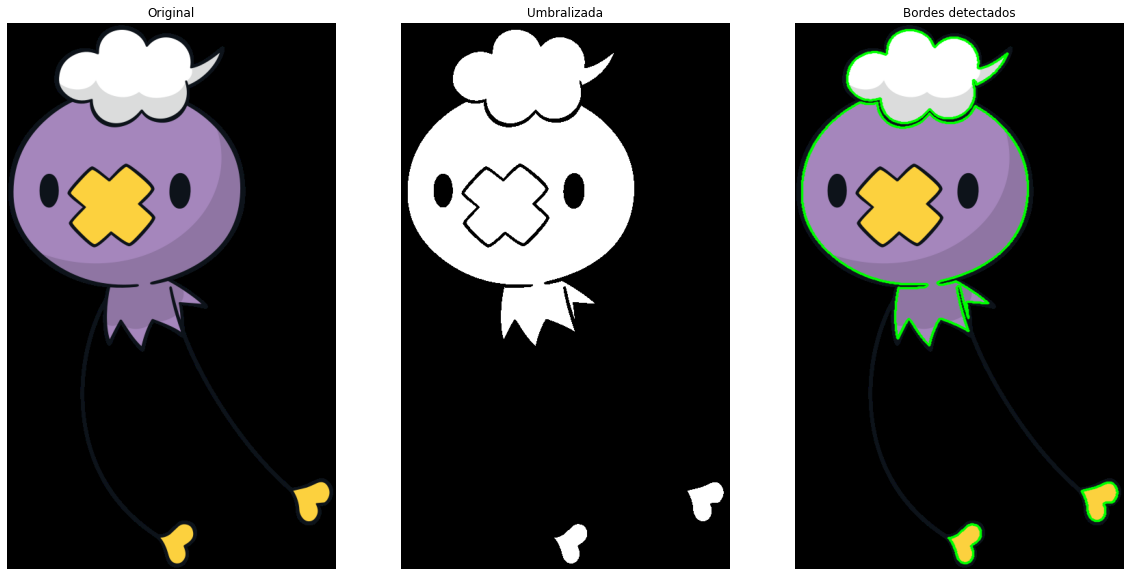

In [4]:
img_cont = img.copy()
cv2.drawContours(img_cont, contours, -1, (0, 255, 0), 2, cv2.LINE_AA)

imagenes = [img, thresh, img_cont]
nombres = ['Original', 'Umbralizada', 'Bordes detectados']

plot_img(imagenes, nombres)
imagenes.clear()
nombres.clear()

## Descriptores del contorno

La segmentación debe detenerse una vez identificados los objetos o regiones de interés de la aplicación.  El conjunto resultante  de píxeles  segmentados  suele representarse y describirse de forma adecuada para su posterior procesamiento informático una  vez  que  la  imagen  ha  sido  segmentada  en  regiones.  El  contorno  de  una  región  puede definirse  por  características  como  su  longitud, area, la  dirección  de  la  línea  recta  que  une  sus extremos y el número de concavidades en el límite.

Existen varios tipos de descriptores para los contornos, los cuales serán vistos uno por uno.

### Momentos

Tras la segmentación, los momentos de la imagen pueden utilizarse para caracterizar las cosas. Se trata de un valor escalar que se calcula a partir de una imagen y que se mantiene constante mientras el elemento sea el mismo, independientemente de su posición, rotación o tamaño. Es útil para identificar los elementos en función de su forma. Los atributos simples de la imagen, como su área (o intensidad total), el centroide y los datos de orientación, pueden descubrirse utilizando los momentos de la imagen. Los momentos espaciales de una imagen se calculan ponderando la media de las intensidades de los píxeles, de la siguiente manera:

$M_{ij}=\sum_{x}^{}\sum_{y}^{}x^iy^jI(x,y)$

La función `cv.moments()` calcula los momentos, hasta el tercer orden, de una forma vectorial o una forma rasterizada. Los resultados se proporciona un diccionario de todos los valores de momento calculados.

#### Sintaxis de la función

``` python
retval = cv2.moments(array, binaryImage)
```

`retval`: Diccionario con los momentos calculados hasta el tercer orden.

La función tiene **1 argumento de entrada requerido** y **1 argumentos opcional**:

<ol>
<li><code>image</code>: Imagen rasterizada (monocanal, 8 bits o matriz 2D de punto flotante) o una matriz (1×N o N×1) de puntos 2D. Es un argumento <b>obligatorio</b>.
<li><code>binaryImage</code>: Si es verdadero, todos los píxeles de la imagen que no son cero se tratan como 1's. El parámetro se utiliza sólo para las imágenes.
</ol>

Para nuestras aplicaciones, se desea calcular los momentos de los contornos anteriormente encontrados, por lo que para la entrada `array` se introducirán los valores almacenados en `contours`.

In [18]:
cnt = contours[0]
moments = cv2.moments(cnt)
print(moments)

{'m00': 1498.5, 'm10': 374374.6666666666, 'm01': 1140600.0, 'm20': 93676913.25, 'm11': 284890839.2083333, 'm02': 868483094.5833333, 'm30': 23476377784.7, 'm21': 71268294281.31667, 'm12': 216871874944.65, 'm03': 661517238525.7001, 'mu20': 145788.09699515998, 'mu11': -68616.78098934889, 'mu02': 302674.1629127264, 'mu30': -46581.50891494751, 'mu21': -648317.2343804538, 'mu12': 643420.1404223442, 'mu03': 870169.2192382812, 'nu20': 0.06492449383881045, 'nu11': -0.030557431411769417, 'nu02': 0.1347912979881122, 'nu30': -0.0005358851030109748, 'nu21': -0.007458400468823699, 'nu12': 0.007402063098881742, 'nu03': 0.010010640113438914}


De estos momentos se pueden extraer datos útiles como el centroide del contorno. El centroide viene dado por las relaciones:<br>

$cx=\frac{M_{10}}{M_{00}}$
<br><br>
$cy=\frac{M_{01}}{M_{00}}$

Una vez calculados los centroides, es posible marcar estos centros mediante el uso de algún marcador. Esto se puede hacer de la siguiente manera:

Text(0.5, 1.0, 'Contornos con centroides')

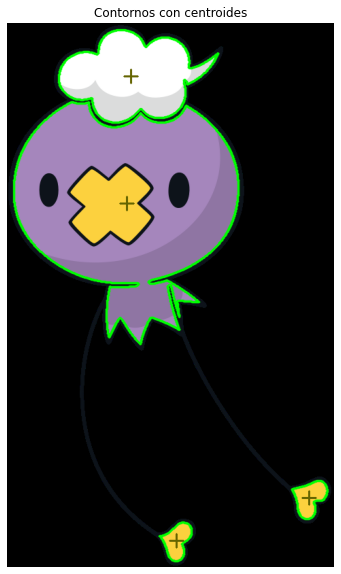

In [15]:
i = 1
for cnt in contours:
    moments = cv2.moments(cnt)
    if moments['m00'] != 0:
        cx = moments['m10'] / moments['m00']
        cy = moments['m01'] / moments['m00']
        cv2.drawMarker(img_cont, (int(cx), int(cy)), (0, 100, 100), cv2.MARKER_CROSS, thickness=2)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img_cont, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Contornos con centroides')

### Área

Otro descriptor relacionado al momento es el area de un contorno. El área del contorno mide el área que ocupa un determinado contorno, que es, la cantidad de pixeles que abarca dicho contorno o la forma que adopta en la imagen. En esencia, se descubre un área para el objeto cerrado, pero si el contorno de una imagen no es de tipo cerrado, se asume automáticamente que lo es y se calcula el área para él.

Usando `cv2.contourArea()` y un determinado contorno como entrada, podemos determinar el área de un contorno o forma en una imagen.

#### Sintaxis de la función

``` python
retval = cv2.contourArea(contour, oriented=False)
```

`retval`: Valor del area.

La función tiene **1 argumento de entrada requerido** y **1 argumentos opcional**:

<ol>
<li><code>contour</code>: Vector de entrada de puntos 2D (vértices del contorno). Es un argumento <b>obligatorio</b>.
<li><code>oriented</code>: Bandera de área orientada. Si es verdadero, la función devuelve un valor de área con signo, dependiendo de la orientación del contorno (en el sentido de las agujas del reloj o en sentido contrario). Con esta función se puede determinar la orientación de un contorno tomando el signo de un área. Por defecto, el parámetro es <code>False</code>.
</ol>

In [7]:
cnt = contours[0]
area = cv2.contourArea(cnt)
m = cv2.moments(cnt)
m0 = m['m00']
print(f'Area del primer contorno: {area}')
print(f'Momento 0 del primer contorno: {m0}')

Area del primer contorno: 1498.5
Momento 0 del primer contorno: 1498.5


Se observa como el valor del area para el primer contorno del arreglo tiene el mismo valor que el momento $M_{00}$.

### Perímetro

El perímetro del contorno es la longitud total del arco que rodea el objeto o la forma en la imagen. En consecuencia, el perímetro del contorno es la longitud del arco en su totalidad. Pasando el objeto de contorno cuyo perímetro necesita ser determinado.

Podemos utilizar el método incorporado `cv2.arclength()` en OpenCV para determinar la longitud de un arco.

#### Sintaxis de la función

``` python
retval = cv2.arclenght(curve, closed)
```

`retval`: Valor de la longitud de arco.

La función tiene **1 argumento de entrada requerido** y **1 argumentos opcional**:

<ol>
<li><code>curve</code>: Vector de entrada de puntos 2D. Es un argumento <b>obligatorio</b>.
<li><code>closed</code>: Bandera que indica si la curva está cerrada o no.
</ol>

In [16]:
perimeter = cv2.arcLength(cnt, True)
print(perimeter)

715.0092276334763


### Rectángulo delimitador

#### Rectángulo recto delimitador

Después de adquirir un contorno, el comando `cv2.boundingRect()` facilitará a los usuarios llamar la atención sobre la región de interés en una imagen. Es un rectángulo recto, no considera la rotación del objeto. Así que el área del rectángulo delimitador no será mínima.

##### Sintaxis de la función

``` python
x, y, w, h = cv2.boundingRect(array)
```

`x`: Coordenada $x$ de origen del rectángulo.<br>
`y`: Coordenada $y$ de origen del rectángulo.<br>
`w`: Ancho del rectángulo.<br>
`h`: Alto del rectángulo.<br>

La función tiene **1 argumento de entrada requerido**:

<ol>
<li><code>array</code>: Imagen de entrada en escala de grises o conjunto de puntos 2D. Es un argumento <b>obligatorio</b>.
</ol>

Text(0.5, 1.0, 'Rectángulo delimitador')

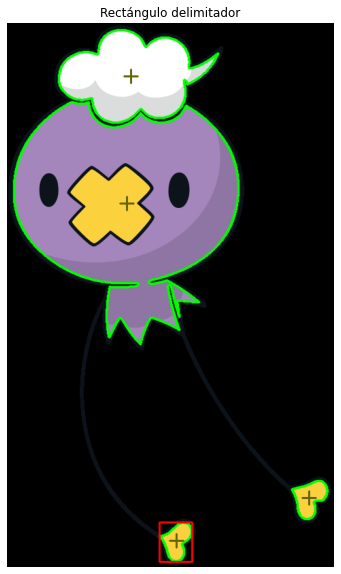

In [21]:
x, y, w, h = cv2.boundingRect(cnt)
cv2.rectangle(img_cont, (x, y), (x+w, y+h), (0, 0, 255), 2)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img_cont, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Rectángulo delimitador')

#### Rectángulo rotado

Aquí, el rectángulo delimitador se dibuja con el área más pequeña posible, teniendo en cuenta la rotación. Utiliza el método `cv.minAreaRect()`. Devuelve los datos de origen (x, y), ancho, altura y ángulo de rotación. Sin embargo, necesitamos las cuatro esquinas del rectángulo para poder dibujarlo. Esto se adquiere utilizando la función `cv.boxPoints()`.

##### Sintaxis de las funciones

``` python
rect = cv2.minAreaRect(points)
```

`rect`: Vector con coordenadas del centro, ancho, alto y ángulo de rotación.<br>

La función tiene **1 argumento de entrada requerido**:

<ol>
<li><code>points</code>: Vector de entrada de puntos 2D. Es un argumento <b>obligatorio</b>.
</ol>

<br>

``` python
points = cv2.boxPoints(rect)
```

`points`: Vector de puntos de un rectángulo.<br>

La función tiene **1 argumento de entrada requerido**:

<ol>
<li><code>rect</code>: El rectángulo girado de entrada. Es un argumento <b>obligatorio</b>.
</ol>

Valores del rectángulo mínimo: X=253.72744750976562, Y=762.3538208007812, Ancho=46.20473098754883, Alto=50.95138168334961, Angulo=57.2647705078125°

Vertice 1: X = 219, Y = 756
Vertice 2: X = 262, Y = 729
Vertice 3: X = 287, Y = 768
Vertice 4: X = 244, Y = 795


Text(0.5, 1.0, 'Rectángulo delimitador rotado')

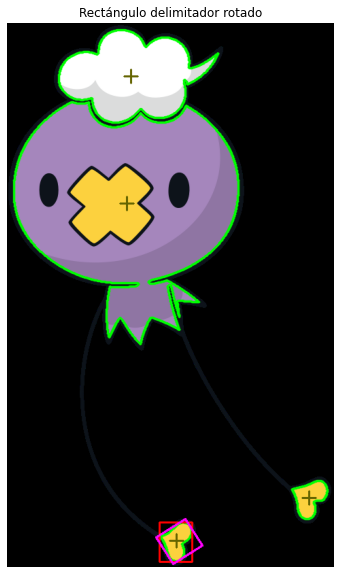

In [38]:
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
cv2.drawContours(img_cont,[box],0,(255,0,255),2)

print(f'Valores del rectángulo mínimo: X={rect[0][0]}, Y={rect[0][1]}, Ancho={rect[1][0]}, Alto={rect[1][1]}, Angulo={rect[2]}°')
print()

for i, cord in enumerate(box):
    print(f'Vertice {i+1}: X = {cord[0]}, Y = {cord[1]}')

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img_cont, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Rectángulo delimitador rotado')

## Ejercicios

<ol>
<li>
Diseñar un programa en Python en el cual se cumplan los siguientes requisitos:
    <ul>
    <li>Cargar una imagen de distintas monedas desde el disco duro.</il>
    <li>Convertir estas imagenes a escala de grises y umbralizarla para separarla del fondo.</li>
    <li>Encontrar los contornos de las monedas.
    <li>En la imagen original, dibujar los contornos encontrados y el centroide para cada uno.</li>
    <li>En la imagen umbralizada, el area para cada moneda.
    <li>En la consola, se debe imprimir el número de monedas que se encuentran en la imagen.
    </ul>
</li>
<br>
<li>
Diseñar un programa en Python en el cual se cumplan los siguientes requisitos:
    <ul>
    <li>Cargar una imagen de distintas monedas desde el disco duro.</il>
    <li>Convertir estas imagenes a escala de grises y umbralizarla para separarla del fondo.</li>
    <li>Encontrar los contornos de las monedas.
    <li>En la imagen original, dibujar los contornos encontrados.
    <li>En base a las areas encontradas en el ejercicio anterior, crear un diccionario para el area de cada moneda en relación con su valor monetario.
    <li>Denominar cada moneda con su valor monetario en base a su area.
    <li>Mostrar una suma del valor monetario total que hay en la imagen.
    </ul>
</li>
</ol>
<br>